# Face recognition with ORL

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from utils import load_dataset, image_width, image_height, rotate_image, num_classes
from scipy import misc, ndimage

plt.gray()

## 2 - Upload dataset ##

In [3]:
# Loading the ORL faces dataset
train_X_origin, train_Y, test_X_origin, test_Y = load_dataset()

print ("train_X shape: " + str(train_X_origin.shape))
print ("train_Y shape: " + str(train_Y.shape))
print ("test_X shape: " + str(test_X_origin.shape))
print ("test_Y shape: " + str(test_Y.shape))

train_X shape: (320, 92, 112, 1)
train_Y shape: (320, 1)
test_X shape: (80, 92, 112, 1)
test_Y shape: (80, 1)


In [4]:
# Let's standardize our dataset.
train_X_scaled = train_X_origin/255.
test_X_scaled = test_X_origin/255.

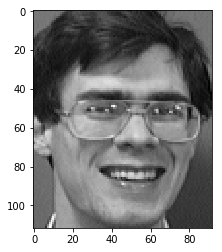

In [5]:
# Example of a picture
index = 11
plt.imshow(train_X_scaled[index].reshape(image_height, image_width))
plt.show()

In [6]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    
    v = image.reshape(image.shape[0], -1)

    return v

In [7]:
# Reshape the training and test examples so that images of size (92, 112, 1) are flattened into single vectors
train_X = image2vector(train_X_scaled) 
test_X = image2vector(test_X_scaled) 
print ("flattened train_X: " + str(train_X.shape))
print ("flattened test_X: " + str(test_X.shape))

flattened train_X: (320, 10304)
flattened test_X: (80, 10304)


## 3 -  Classification algorithm ##

In [8]:
#Euclidean distance between 2-dimensional point
def find_euclidean_distance(A, B):
    return np.sqrt(np.sum((A - B)**2))

In [9]:
distance = find_euclidean_distance(train_X[0:1], test_X[0:1])
print("Euclidean distance between first rows: ", distance)

Euclidean distance between first rows:  22.725685


In [10]:
def classify(train_data, train_labels, testData, numberOfClasses = num_classes, k = 1):
    #Euclidean distance between 2-dimensional point
    test_labels = []
    for testPoint in testData:
        #Claculate distances between test point and all of the train points
        testDist = [ [find_euclidean_distance(testPoint, train_data[i]), train_labels[i][0]] for i in range(train_data.shape[0])]
        #How many points of each class among nearest K
        stat = [0 for i in range(numberOfClasses)]
        
        for d in sorted(testDist)[0:k]:
            stat[d[1]] += 1.0
        #Assign a class with the most number of occurences among K nearest neighbours
        test_labels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
    return np.array(test_labels).reshape(80,1)
#     return test_labels.reshape(80,1)

In [11]:
predicted_Y = classify(train_X, train_Y, test_X)

In [12]:
print(predicted_Y.flatten())
print(test_Y.flatten())

[25 13 15 38 22 35 33 35 24 34 20 31  1 36 26 17  1 11  3 13 21 19 20 39
 27  8 30 31  3 28 36  2 16 26 14  5 28 11  5 15 21 30  0 16 37  7 27  9
 14 24 12 17  9  0 39  7  2 29  8 25 10 37  4  6 12 18 23 19 32 29  6 35
 18 10  4 38 33 32 23 22]
[25 13 15 38 22 35 33 34 24 34 20 31  1 36 26 17  1 11  3 13 21 19 20 39
 27  8 30 31  3 28 36  2 16 26 14  5 28 11  5 15 21 30  0 16 37  7 27  9
 14 24 12 17  9  0 39  7  2 29  8 25 10 37  4  6 12 18 23 19 32 29  6 35
 18 10  4 38 33 32 23 22]


In [13]:
def calc_accuracy(X, Y):
    """
    Calculate the model accuracy. Predicted labels vs true ones.
    
    Argument:
    X -- a numpy array (labels) of shape (length, height). Usually, it's a matrix of predicted labels.
    Y -- a numpy array (labels) of shape (length, height). Usually, it's a matrix of real labels.
    
    Returns:
    accuracy -- a classification accuracy
    """
    accuracy = (X == Y).mean()
    return accuracy

In [14]:
print ("Accuracy: ", calc_accuracy(predicted_Y, test_Y))

Accuracy:  0.9875


## 4 - Image normalization ## 

In [15]:
def normalize(X,axis=0):
    """
    Normalize dataset by features or samples. 
    
    Argument:
    X -- a numpy array (dataset) of shape (length, height, depth)
    axis -- an axis along which the normalization is computed. 0 - normalization by features, 
            1 - normalization by samples. Default value is 0
    
    Returns:
    N -- a normalized dataset
    
    - If we have whole dataset we can for each feature in the dataset 
    calculate mean value and subtract it from the feature. 
    - In case of continuously growing dataset like online learning 
    we normalize each observation (face image in our case) separately: 
    calculate mean from data entry (one face image), subtract mean from original image 
    and divide it by standard deviation of the image.

    """
    
    N=(X-X.mean(axis=axis, keepdims=True))/X.std(axis=axis, keepdims=True)
    return N

In [16]:
print('Normalization by samples')
train_X_normalized_by_samples=normalize(train_X, axis=1)
test_X_normalized_by_samples=normalize(test_X, axis=1)
print('Normalization by features')
train_X_normalized_by_features=normalize(train_X, axis=0)
test_X_normalized_by_features=normalize(test_X, axis=0)

Normalization by samples
Normalization by features


In [17]:
predicted_Y_normalized_by_samples = classify(train_X_normalized_by_samples, 
                                             train_Y, 
                                             test_X_normalized_by_samples)

predicted_Y_normalized_by_features = classify(train_X_normalized_by_features, 
                                              train_Y, 
                                              test_X_normalized_by_features)

In [18]:
print ("Accuracy for dataset normalized by samples: ", calc_accuracy(predicted_Y_normalized_by_samples, test_Y))
print ("Accuracy for dataset normalized by features: ", calc_accuracy(predicted_Y_normalized_by_features, test_Y))

Accuracy for dataset normalized by samples:  0.95
Accuracy for dataset normalized by features:  0.9875


**Result table**: 

<style type="text/css">td {text-align:left}</style>
<table style="width:auto">
    <tr>
        <td>  ** Normalization **  </td>
        <td> ** by features ** </td>
        <td> ** by samples ** </td>
        <td> ** no normalization ** </td>
    </tr>
    <tr>
        <td>  ** Accuracy **  </td>
        <td> 98.75% </td>
        <td> 95%</td>
        <td> 98.75% </td>
    </tr>
</table>

## 5 - PCA ##

In [19]:
# TODO 

## 6 - Image alignment ##

In [ ]:
image = train_X_origin[30].reshape(image_height, image_width)
angle = 10

image_orig = np.copy(image)
image_height, image_width = image_orig.shape[0:2]

print("Original Image: ", image.shape)
plt.imshow(image)
plt.show()
image_rotated = rotate_image(image, angle)
print("Rotated Image: ", image_rotated.shape)
plt.imshow(image_rotated)
plt.show()

print("Done")